# Demo 5: Investigating the focus finder

In this demo, we set up an experiment to see how well the focus finder works.
We do this by generating hundred realisations of:
- a paraboloid,
- an ellipsoid with "orient" set to "z",
- an ellipsoid with "orient" set to "x".

For each of the realisations for each reflector, we record the difference between the actual and the found focus and check this. The difference between realisations is the focus location $p_f$ of the reflector: we let this range from 1 mm to 100 mm with respect to the vertex (paraboloids) or origin (ellipsoids).

Finding focii for paraboloids...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90
Finding focii for ellipsoids oriented along z...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90
Finding focii for ellipsoids oriented along x...
i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


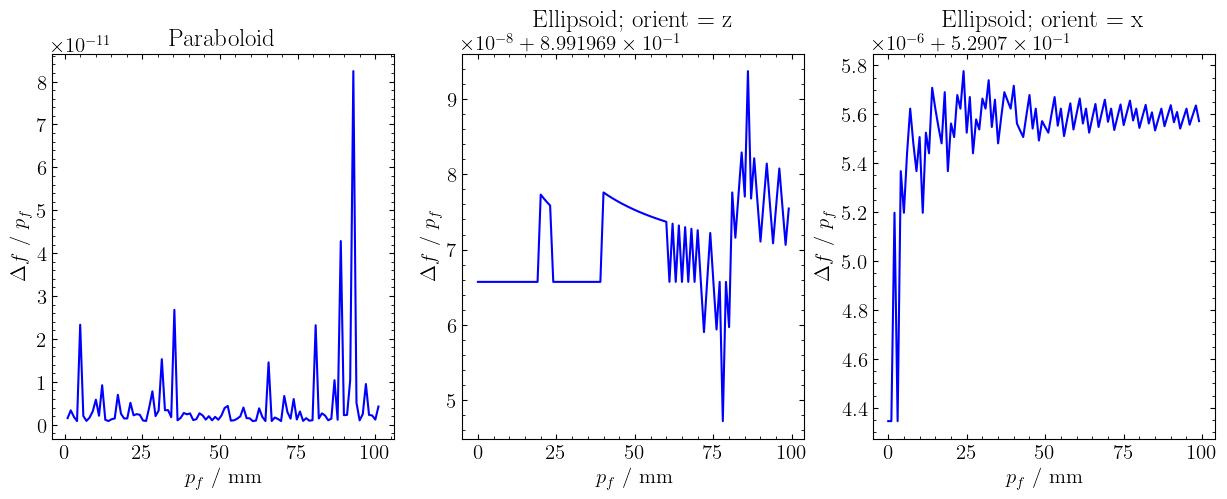

In [1]:
#%matplotlib notebook # Uncomment for interactive plots when running the notebook!
import numpy as np

from PyPO.System import System

import matplotlib.pyplot as pt

def getParabola(i):
    s = System(verbose=False)

    TubeRTDict = {
            "name"      : "start",
            "nRays"     : 10,
            "nRing"     : 10,
            "angx0"     : 0,
            "angy0"     : 0,
            "x0"        : 1,
            "y0"        : 1
            }

    s.createTubeFrame(TubeRTDict)

    focus = np.array([0, 0, i+1])

    parabola = {
            "name"      : "parabola",
            "gmode"     : "uv",
            "pmode"     : "focus",
            "focus_1"   : focus,
            "vertex"    : np.zeros(3),
            "lims_u"    : np.array([0, 1]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([101, 100])
            }

    s.addParabola(parabola)
    s.translateGrids("start", focus, obj="frame")
    
    return s

def getEllipse(i, orient):
    s = System(verbose=False)

    TubeRTDict = {
            "name"      : "start",
            "nRays"     : 10,
            "nRing"     : 10,
            "angx0"     : 5,
            "angy0"     : 5,
            "x0"        : 0,
            "y0"        : 0
            }

    s.createTubeFrame(TubeRTDict)

    if orient == "z":
        focus1 = np.array([0, 0, i+1])
    else:
        focus1 = np.array([i+1, 0, 0])

    focus2 = -focus1 

    ellipse = {
            "name"      : "ellipse",
            "gmode"     : "uv",
            "pmode"     : "focus",
            "orient"    : orient,        
            "flip"      : True,
            "focus_1"   : focus1,
            "focus_2"   : focus2,
            "ecc"       : 0.5,
            "lims_u"    : np.array([0, 1]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([101, 100])
            }

    s.addEllipse(ellipse)

    s.translateGrids("start", focus1, obj="frame")
    
    return s

# We run the random paraboloids first.
runRTDict = {
        "fr_in"     : "start",
        "fr_out"    : "fr_par",
        "t_name"    : "parabola",
        "tol"       : 1e-12,
        "device"    : "CPU"
        }

diff_par = []
print("Finding focii for paraboloids...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getParabola(i)
    
    distance = np.absolute(s.system["parabola"]["focus_1"] - s.system["parabola"]["vertex"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_par")
    
    diff_rel = np.linalg.norm(s.system["parabola"]["focus_1"] - foc_find) / distance
    diff_par.append(diff_rel)

    del s

# Then we run the ellipsoids oriented along the z axis.
runRTDict = {
        "fr_in"     : "start",
        "fr_out"    : "fr_ell",
        "t_name"    : "ellipse",
        "tol"       : 1e-12,
        "device"    : "CPU"
        }

diff_ell_z = []

print("Finding focii for ellipsoids oriented along z...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getEllipse(i, "z")
    
    distance = np.absolute(s.system["ellipse"]["focus_1"] - s.system["ellipse"]["focus_2"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_ell")

    diff_rel = np.linalg.norm(s.system["ellipse"]["focus_2"] - foc_find) / distance
    diff_ell_z.append(diff_rel)

    del s

# Then we run the ellipsoids oriented along the x axis.
runRTDict = {
            "fr_in"     : "start",
            "fr_out"    : "fr_ell",
            "t_name"    : "ellipse",
            "tol"       : 1e-12,
            "device"    : "CPU"
            }

diff_ell_x = []

print("Finding focii for ellipsoids oriented along x...")
for i in range(100):
    if i % 10 == 0:
        print(f"{i = }")
    s = getEllipse(i, "x")
    
    distance = np.absolute(s.system["ellipse"]["focus_1"] - s.system["ellipse"]["focus_2"])

    s.runRayTracer(runRTDict)
    foc_find = s.findRTfocus("fr_ell")

    diff_rel = np.linalg.norm(s.system["ellipse"]["focus_2"] - foc_find) / distance
    diff_ell_x.append(diff_rel)

    del s
    
ranges = np.linspace(1, 101, 100)

fig, ax = pt.subplots(1,3, figsize=(15,5))
ax[0].plot(ranges, diff_par, color="blue")
ax[0].set_xlabel(r"$p_f$ / mm")
ax[0].set_ylabel(r"$\Delta f$ / $p_f$")
ax[0].set_title("Paraboloid")

ax[1].plot(diff_ell_z, color="blue")
ax[1].set_xlabel(r"$p_f$ / mm")
ax[1].set_ylabel(r"$\Delta f$ / $p_f$")
ax[1].set_title("Ellipsoid; orient = z")

ax[2].plot(diff_ell_x, color="blue")
ax[2].set_xlabel(r"$p_f$ / mm")
ax[2].set_ylabel(r"$\Delta f$ / $p_f$")
ax[2].set_title("Ellipsoid; orient = x")
pt.show()

It can be seen that the relative focal error, defined as the difference between the actual focus and the found focus, is small for all tested geometries. However, it is also visible that the paraboloid and ellipsoid oriented along the z axis have focii that are easier to find. The ellipsoid oriented along the x axis has a relative focal error on the order of $3\cdot 10^{-4}$, illustrating that the focus finder has more difficulty with this specific geometry than with the others. Nevertheless, the relative error is quite small and does indicate that the focus finder works as expected.